In [1]:
import time
import pickle 
import warnings
import scipy
import scipy.sparse.linalg
from collections import defaultdict, OrderedDict

from numpy import matrix, asmatrix
from scipy.sparse.sputils import asmatrix

import random
import numpy as np
import fastmat as fm  # need 0.2a3 or later?

import matplotlib.gridspec as gridspec
warnings.filterwarnings("ignore")
from pylab import rcParams
from matplotlib import container
from matplotlib import pyplot as plt
from IPython.core.display import  HTML
from matplotlib import cm # Colormaps

import os, sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.environ['PRJ'] = "~/skisg/"
sys.path.append(os.environ['PRJ'])

random.seed(1337)
np.random.seed(1337)

%load_ext autoreload
%autoreload 2

/var/folders/gj/ns_zjdqx57b1mrqf3l8_rcd40000gp/T/ipykernel_98273/2566655476.py:9: DeprecationWarning: Please use `asmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.sputils` namespace is deprecated.
  from scipy.sparse.sputils import asmatrix


In [2]:
from skisg.interp.sparse.sgindices import compute_indices, compute_levels, get_multi_index_sequence
from skisg.interp.sparse.sgindices import get_level_indices, help_level_indices
from skisg.interp.sparse.basis import phi, phi_li, phi_li_nd

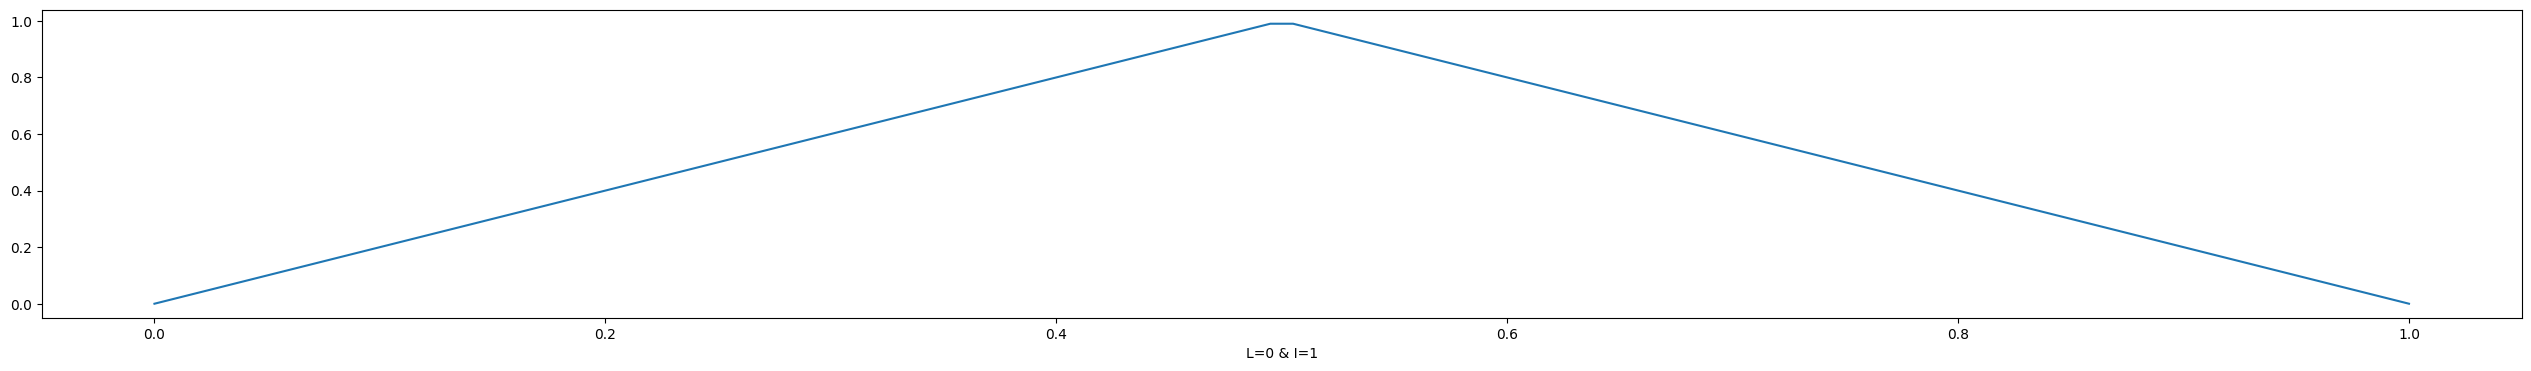

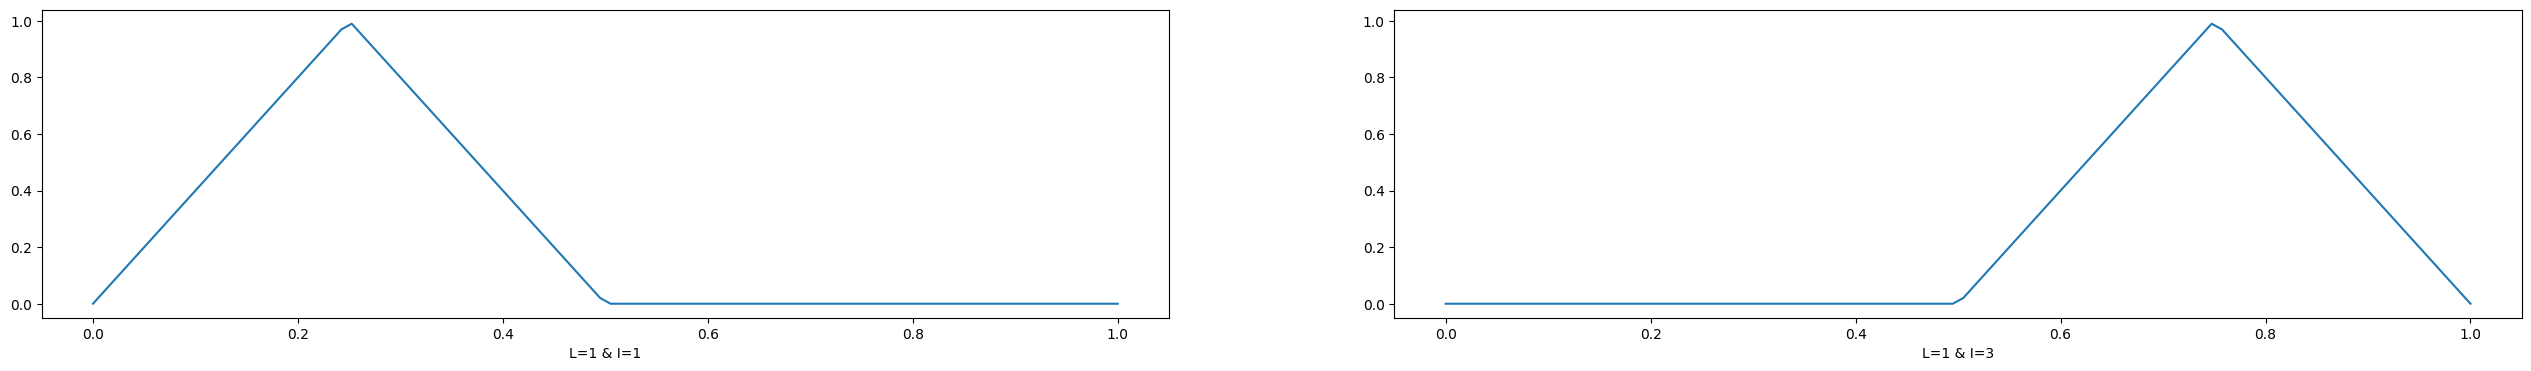

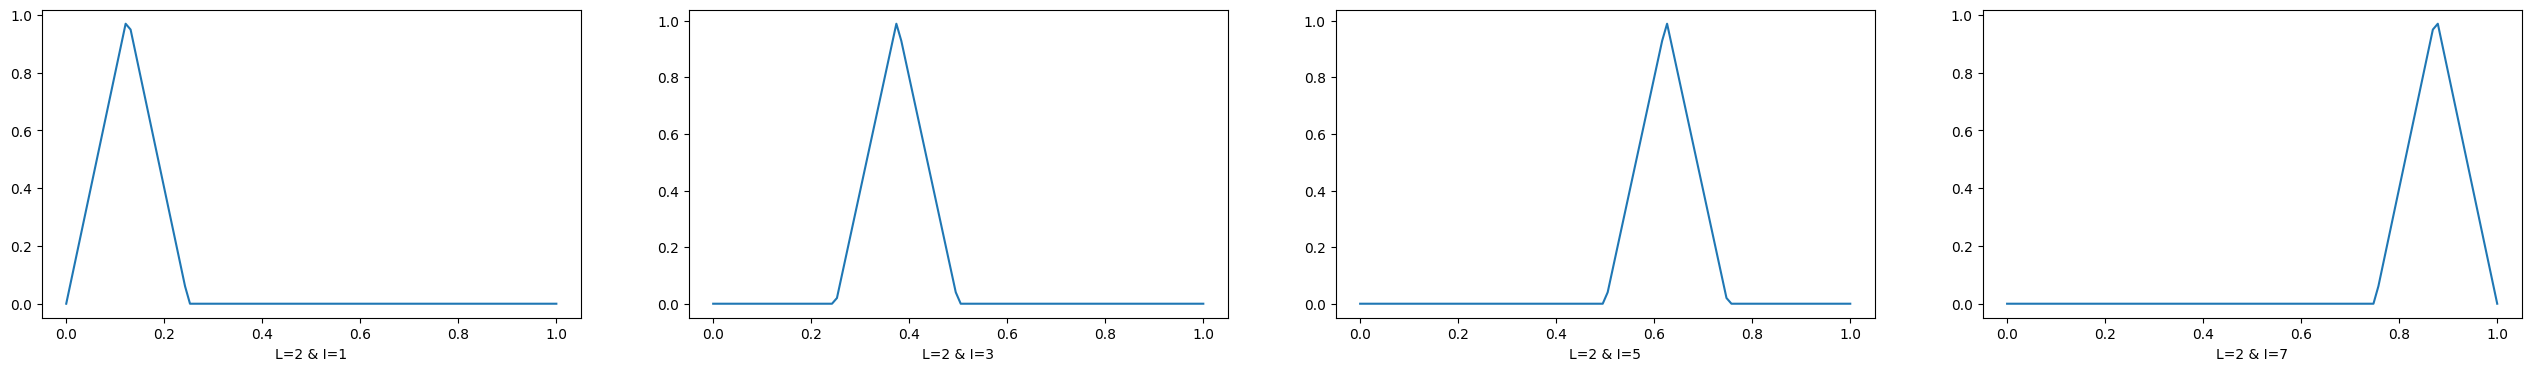

In [3]:
## Visualizing basis functions for 1-D 

figsize = (32, 4)
xx = np.linspace(0, 1, 100)

for i in range(3):
    J = help_level_indices(i)    
    if len(J) == 1:
        plt.figure(figsize=figsize)
        plt.plot(xx, phi_li(xx, 0, 1))
        plt.xlabel('L=0 & I=1')
        plt.show()
        continue     
    fig, axs = plt.subplots(1, len(J), figsize=figsize)    
    for j_i, j in enumerate(J):
        axs[j_i].plot(xx, phi_li(xx, i, j))
        axs[j_i].set_xlabel('L='+ str(i) + ' & I=' + str(j))

#plt.savefig('1dpoints', format='png', dpi=500)
plt.show()


In [4]:
## Visualizing basis functions for 2-D 

npoints = 100
xx = np.linspace(0, 1, npoints)
yy = np.linspace(0, 1, npoints)
X_mesh = np.meshgrid(*[xx, yy],  indexing='ij')
points = np.vstack([X_mesh[0].reshape(-1), X_mesh[1].reshape(-1)]).T


In [5]:
grid_level = 3
ndim = 2
mis = compute_levels(grid_level=grid_level, ndim=ndim)
L, I, R = compute_indices(mis)

In [6]:
Ntx = npoints
Nty = npoints
x_test = np.linspace(0, 1, Ntx)
y_test = np.linspace(0, 1, Nty)
X_test,  Y_test = np.meshgrid(x_test, y_test)
points = np.zeros((Ntx*Nty, 2))
points[:, 0] = X_test.reshape(-1)
points[:, 1] = Y_test.reshape(-1)

MIS:  (0, 0)


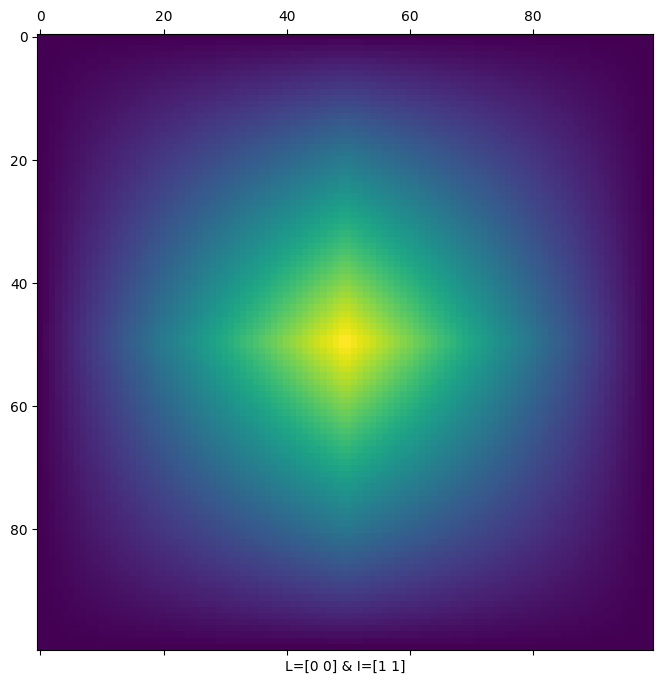

MIS:  (0, 1)


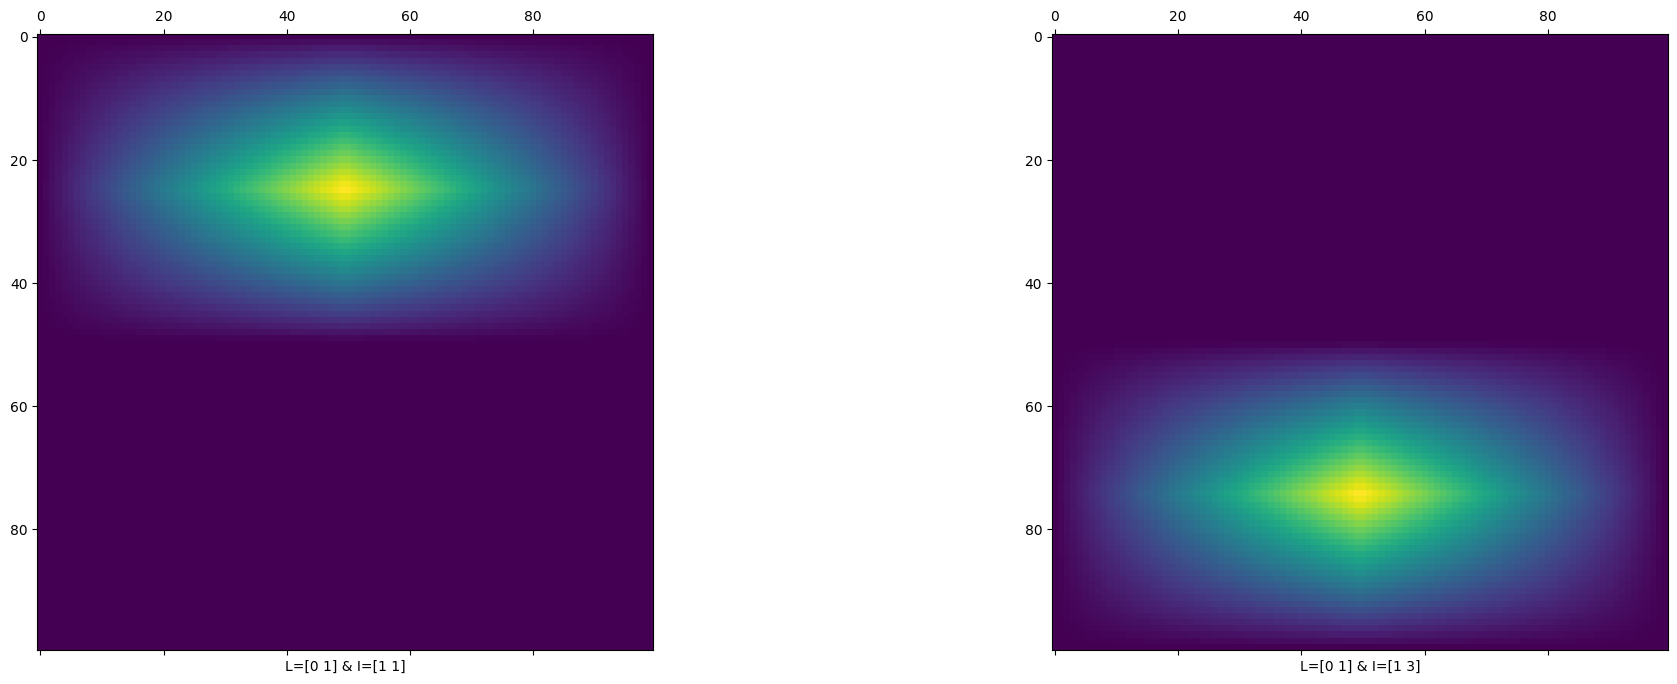

MIS:  (0, 2)


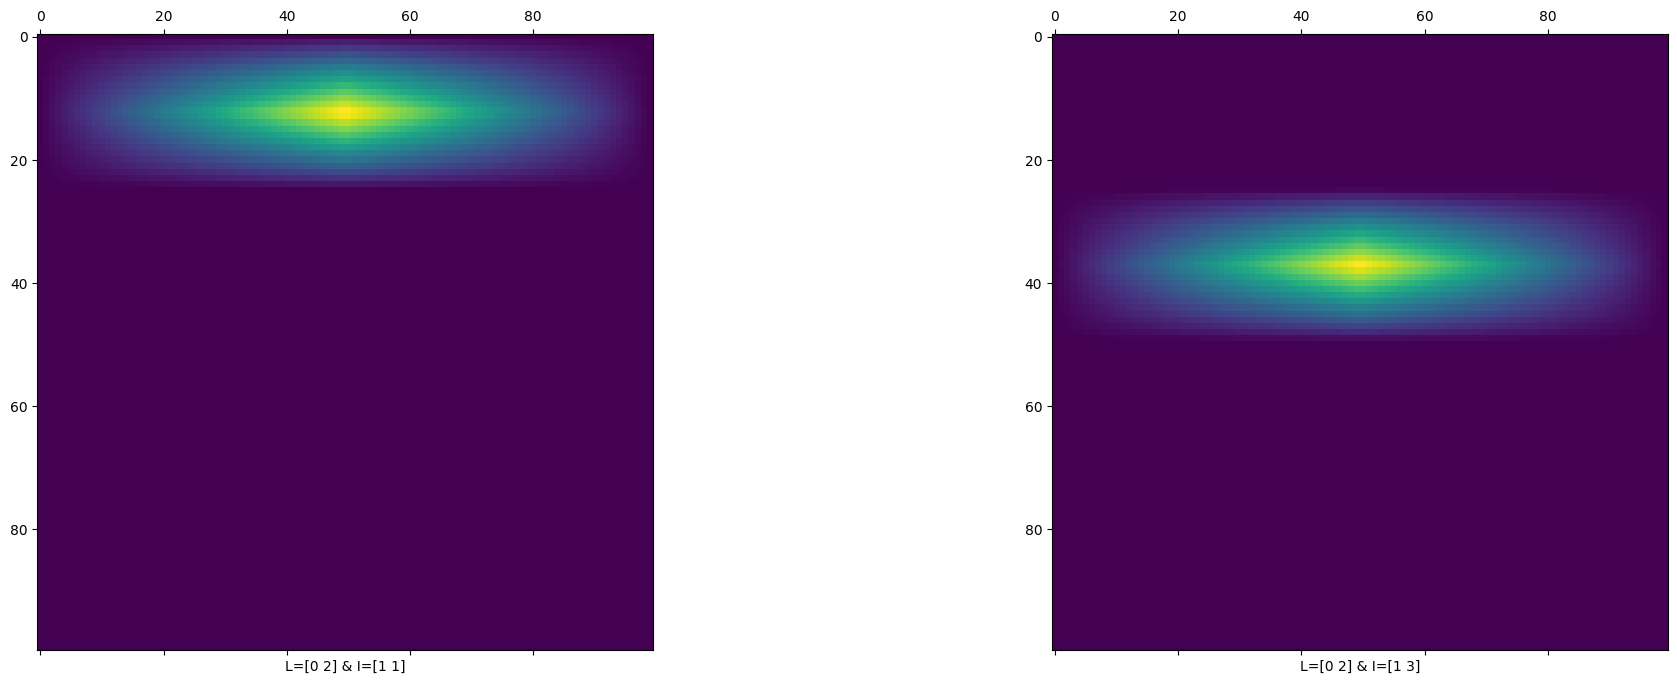

MIS:  (0, 3)


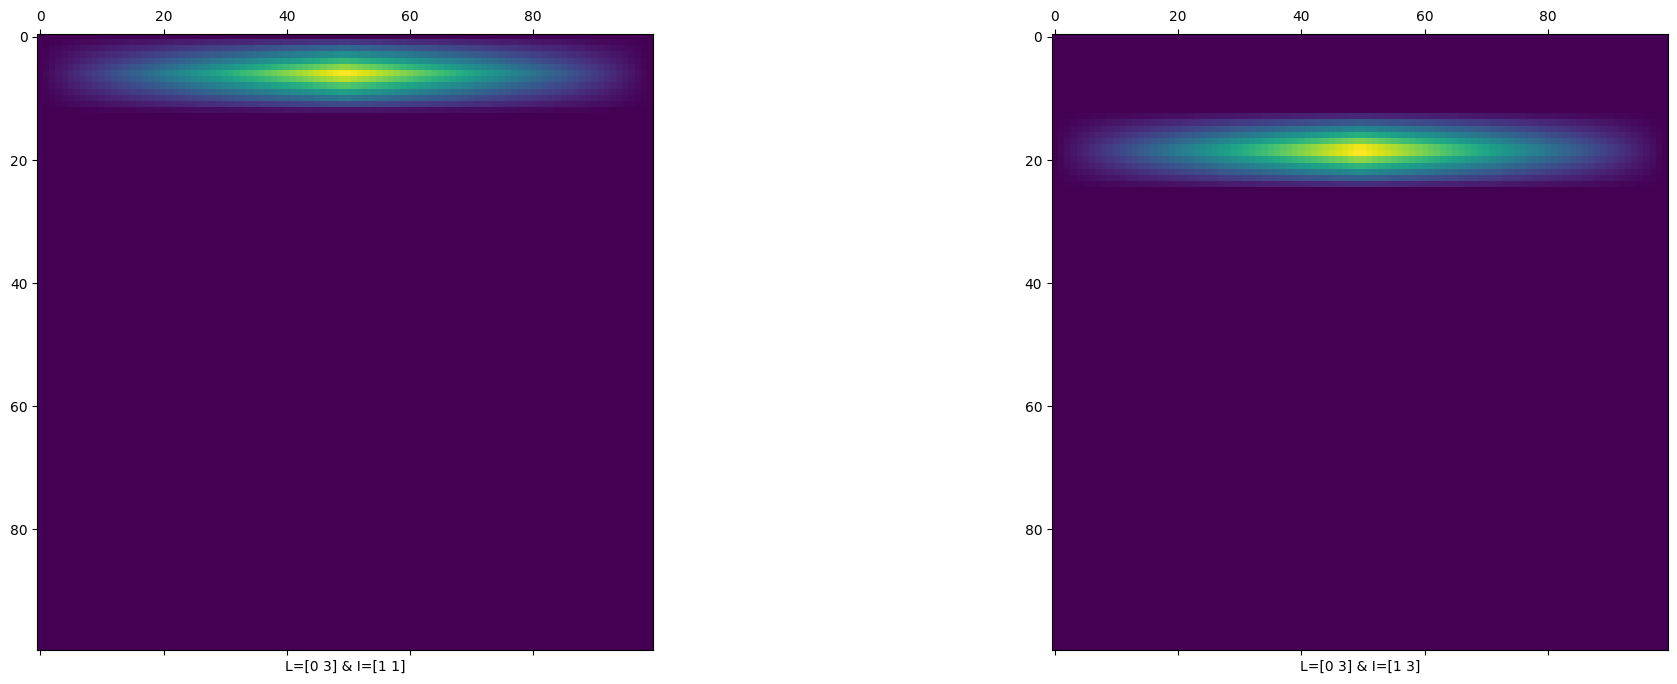

MIS:  (1, 0)


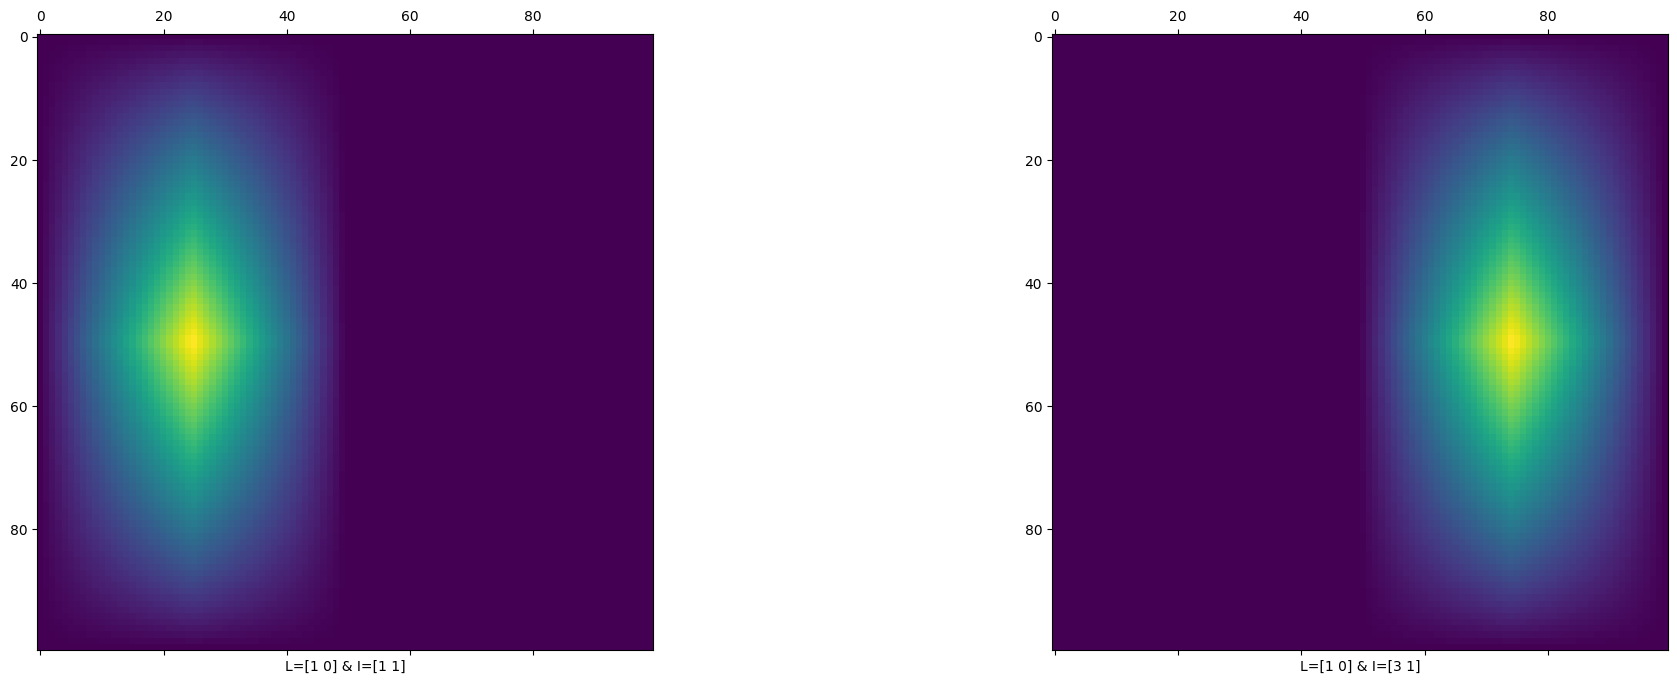

MIS:  (1, 1)


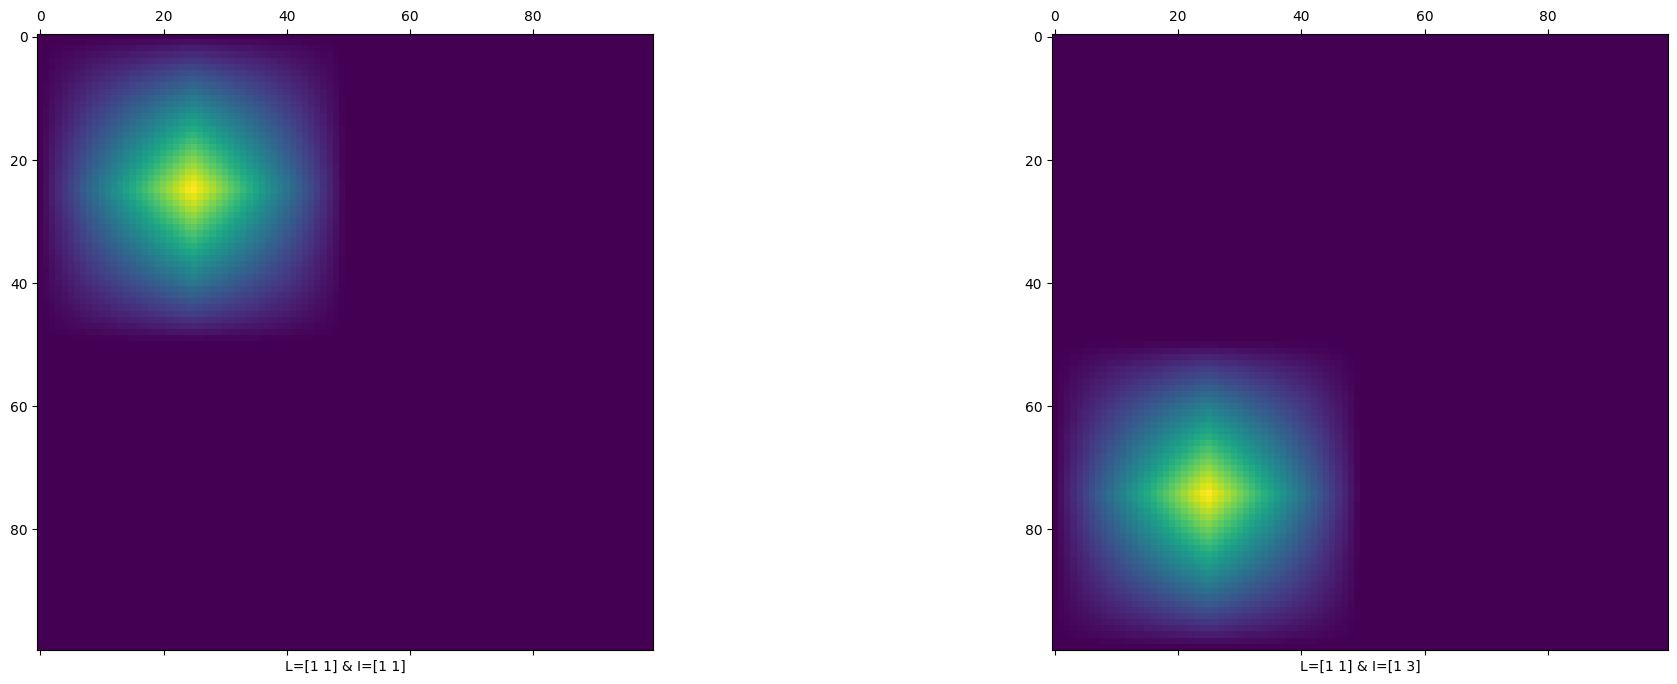

MIS:  (1, 2)


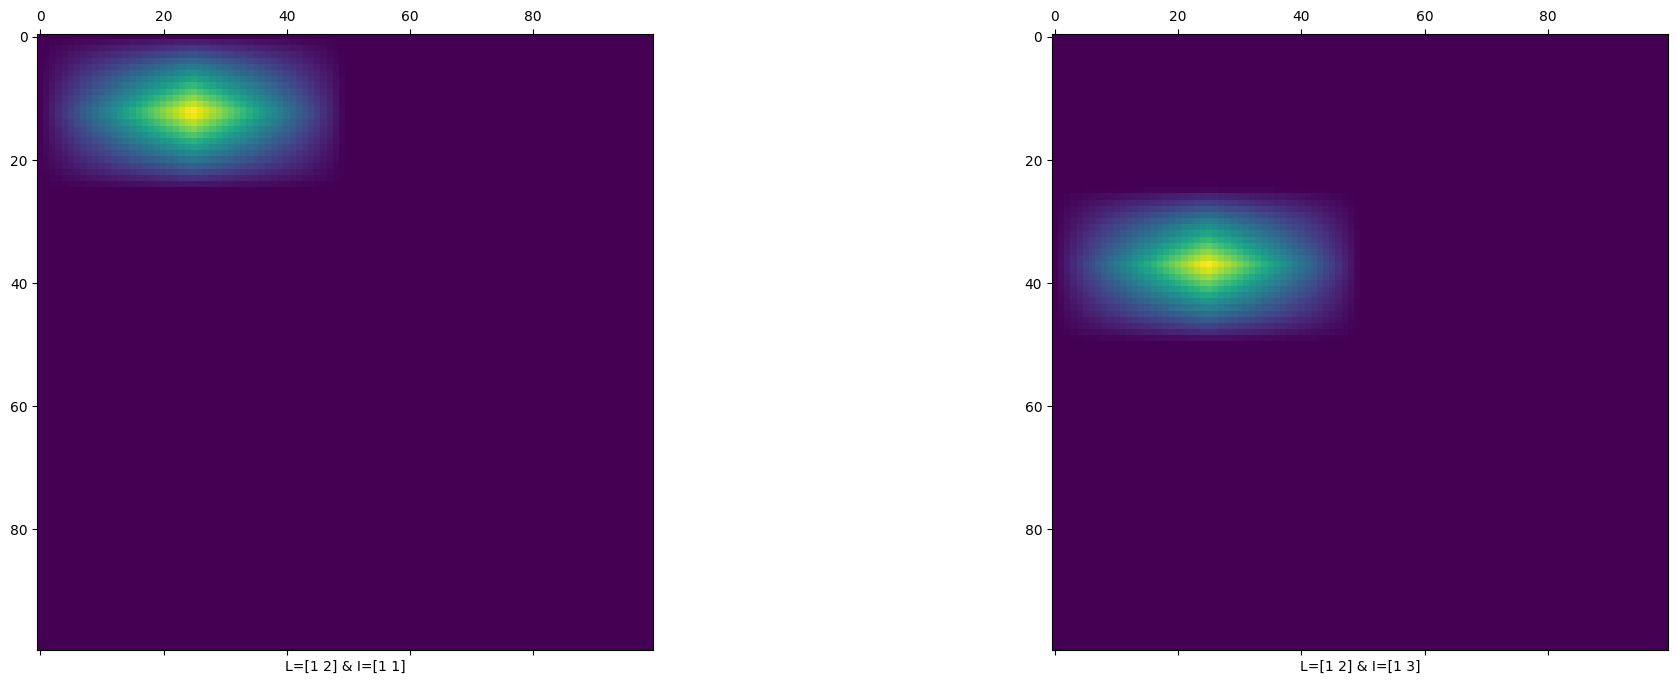

MIS:  (2, 0)


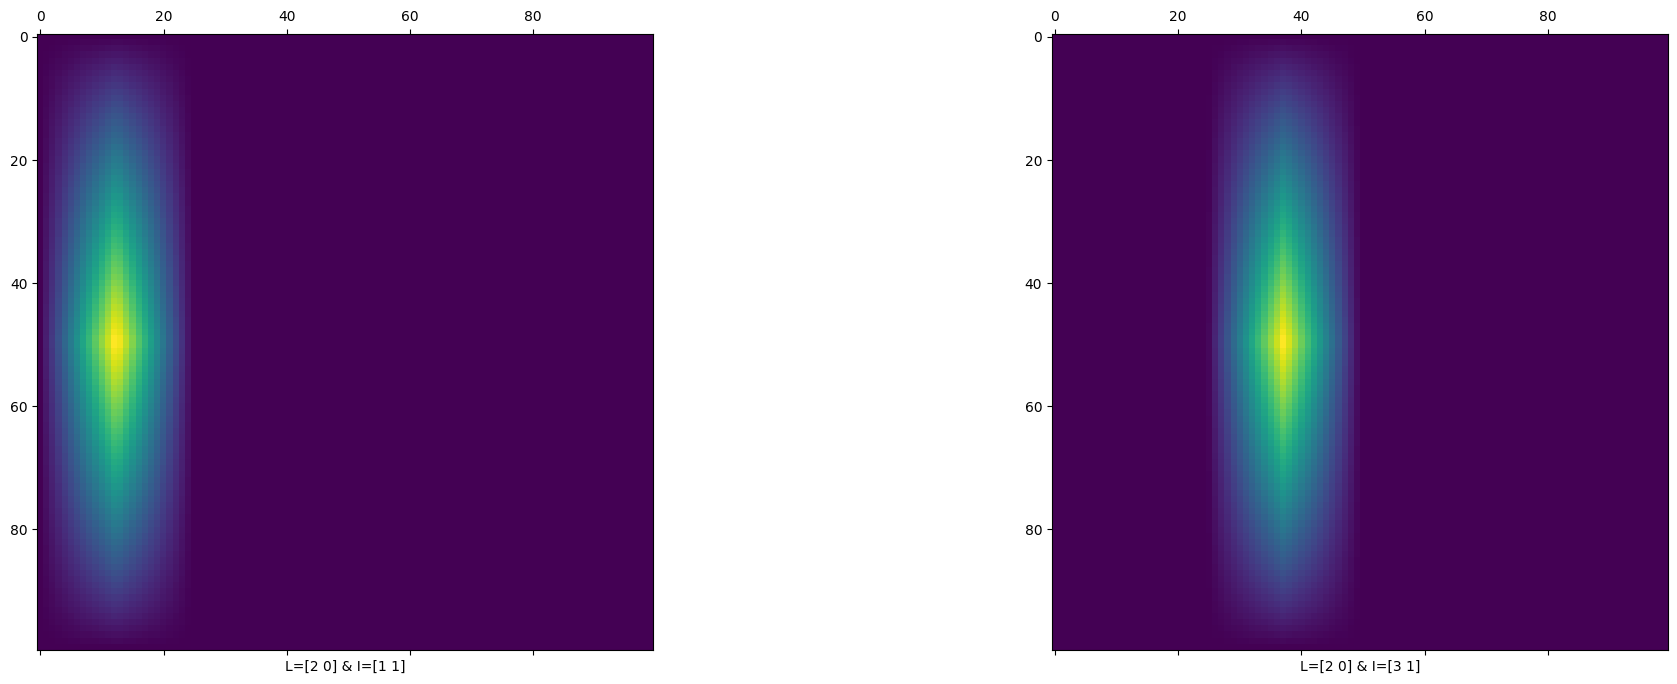

MIS:  (2, 1)


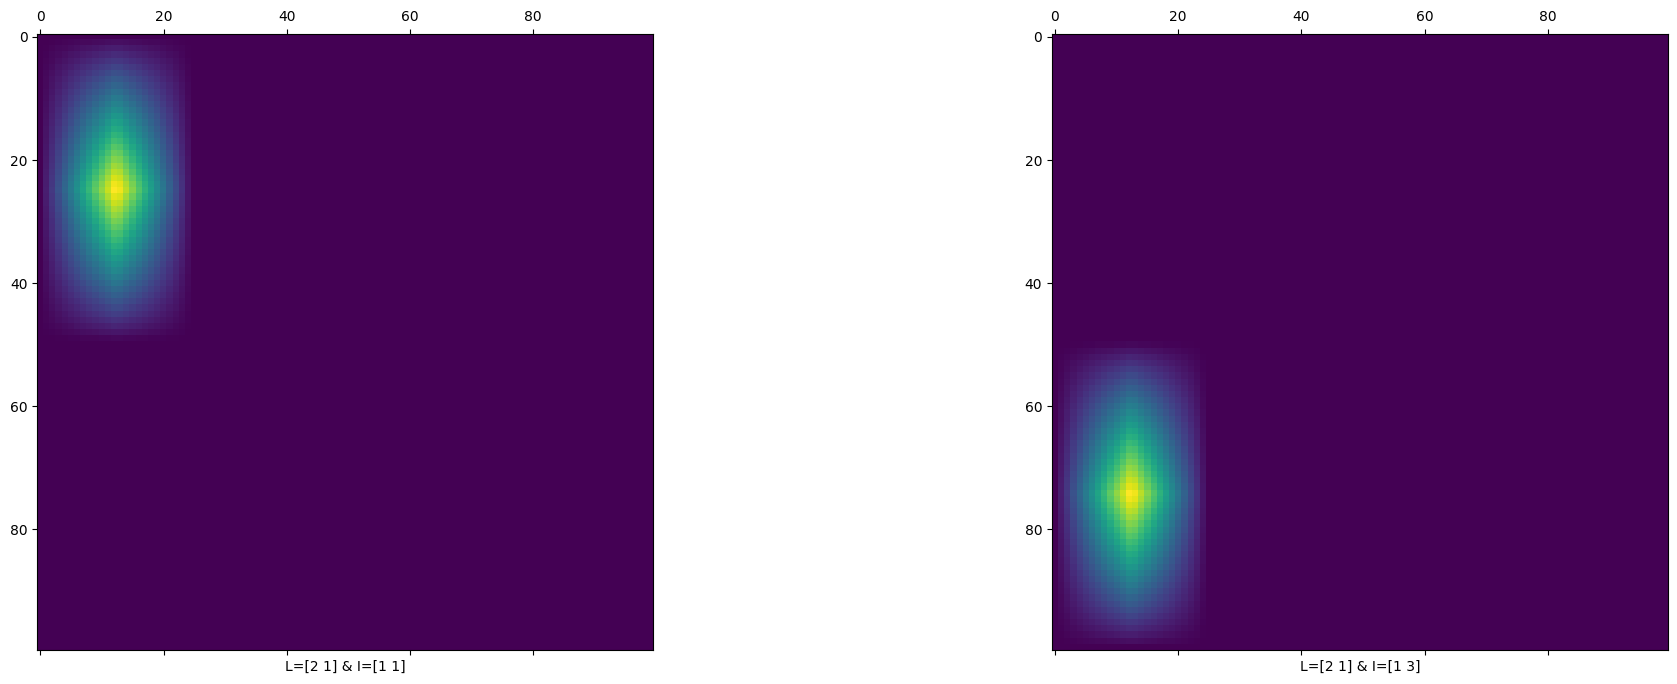

MIS:  (3, 0)


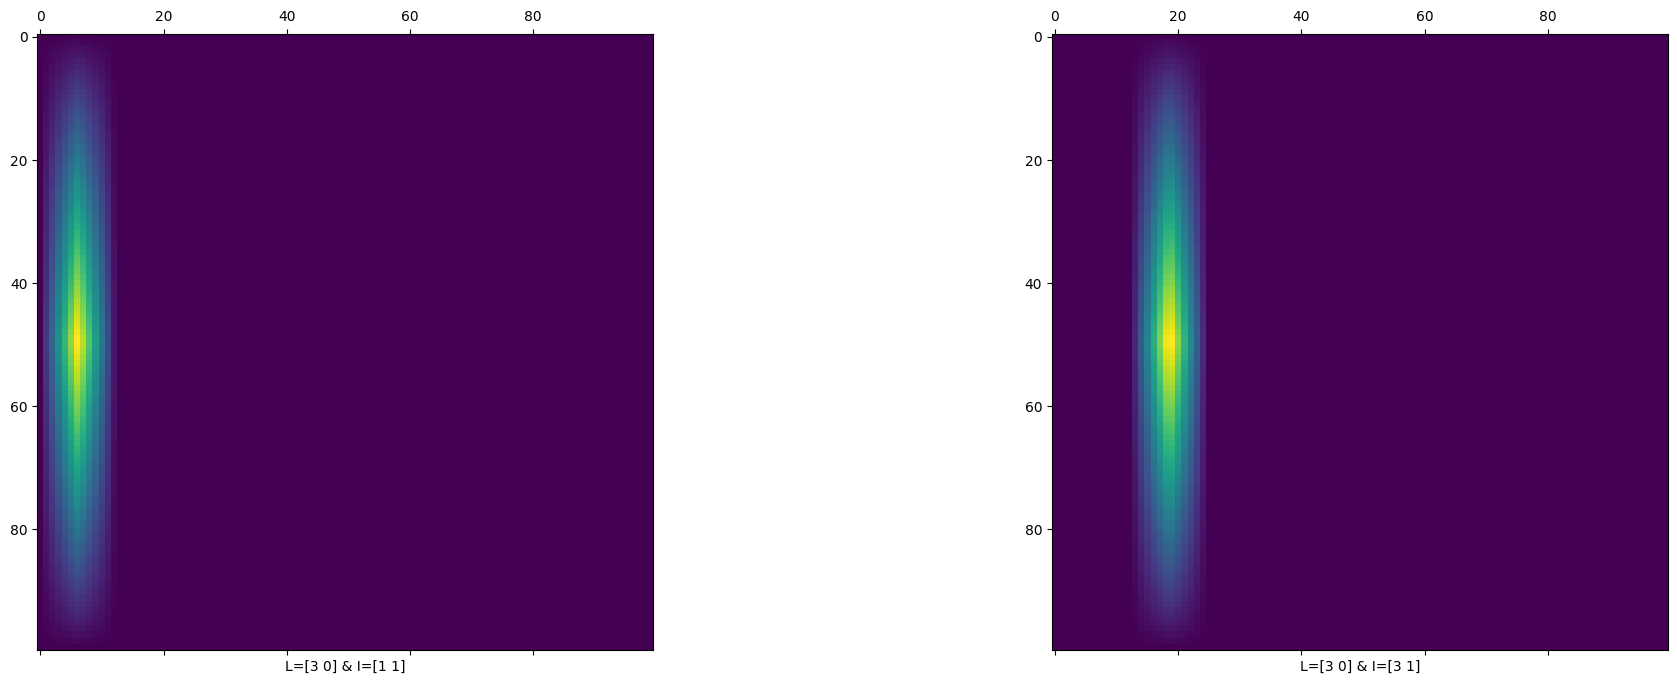

In [7]:
## Visualizing 2-D 

figsize  = (24, 8)

for mis, basis in R.items():
    print("MIS: ", mis)    
    try:
        nplots = basis[1] - basis[0] + 1 
        start, end = basis[0], basis[1] + 1
        
    except IndexError:
        nplots = 1
        start, end = 0, 1

        
    fig, axs = plt.subplots(1, nplots, figsize=figsize)
    
    i = 0
    for index in range(start, end):
        
        Z = phi_li_nd(points, L[index], I[index])
        Z = Z.reshape(npoints, npoints)

        try:
            aax = axs[i].matshow(Z)
            axu = axs[i]
        except TypeError:
            aax = axs.matshow(Z)
            axu = axs
        
        axu.set_xlabel('L='+ str(L[index]) + ' & I=' + str(I[index]))
        #fig.colorbar(aax, ax=axu)
        
        i += 1
        
    plt.show()